# Model Creation For Crowd Couter

In this notebook I'm about to train ResNet50 that I've implemented for "_Food 101_" dataset - [Link](https://www.kaggle.com/datasets/dansbecker/food-101?resource=download)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

import helper_functions
import resnet_50

## Data preparation
The first dataset - [link](https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset)

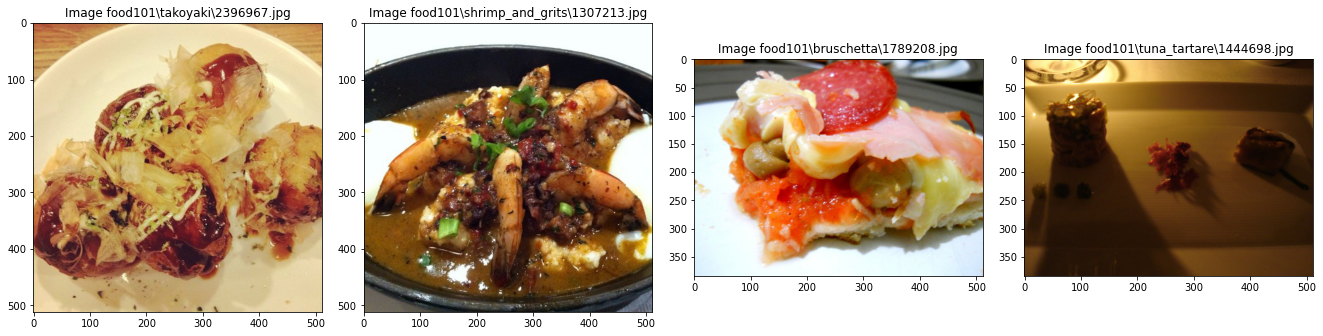

In [5]:
# plot some images

helper_functions.plot_images(img_count=4)

In [2]:
# as seen in above cells images are in various sizes, but it's
# not something that data preprocessing can't handle

# preprocessing (generating) data
datagen_v1 = ImageDataGenerator(rescale=1./255,
                                validation_split=0.1)

# seed for further reproduction
tf.random.set_seed(13)

# set path to images
dir = "food101/"

# import data from <dir> and turn it into batches
train_data = datagen_v1.flow_from_directory(directory=dir,
                                            subset='training',
                                            batch_size=8,
                                            target_size=(256,256),    # big enough to preserve most information,
                                            class_mode="sparse",      # small enough to fit in batches that my
                                            seed=13)                  # laptop could process

validation_data = datagen_v1.flow_from_directory(directory=dir,
                                                 subset='validation',
                                                 batch_size=8,
                                                 target_size=(256,256),
                                                 class_mode="sparse",
                                                 seed=13)

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


## Classification model

### Baseline Model

In [23]:
# some basic conv model to see if our datagen function works

i = i = Input(shape=(256, 256, 3))

x = Conv2D(10, (3, 3), activation="relu")(i)
x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2), padding="valid")(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2), padding="valid")(x)

x = Flatten()(x)
x = Dense(101, activation='softmax')(x)

baseline_model = Model(i, x)

 ### Baseline Model Training

In [24]:
baseline_model.compile(loss = "sparse_categorical_crossentropy",
                       optimizer = "Adam",
                       metrics=["accuracy"])

In [25]:
baseline_model_history = baseline_model.fit(train_data,
                                            validation_data=validation_data,
                                            epochs=10,
                                            steps_per_epoch=1000)

Epoch 1/10
1000/1000 [==============================] - 125s 123ms/step - loss: 4.6204 - accuracy: 0.0118 - val_loss: 4.6036 - val_accuracy: 0.0141
Epoch 2/10
1000/1000 [==============================] - 120s 120ms/step - loss: 4.5753 - accuracy: 0.0234 - val_loss: 4.5589 - val_accuracy: 0.0201
Epoch 3/10
1000/1000 [==============================] - 122s 122ms/step - loss: 4.4876 - accuracy: 0.0551 - val_loss: 4.5413 - val_accuracy: 0.0271
Epoch 4/10
1000/1000 [==============================] - 122s 122ms/step - loss: 4.3457 - accuracy: 0.1067 - val_loss: 4.5643 - val_accuracy: 0.0347
Epoch 5/10
1000/1000 [==============================] - 127s 127ms/step - loss: 4.1845 - accuracy: 0.1443 - val_loss: 4.5682 - val_accuracy: 0.0361
Epoch 6/10
1000/1000 [==============================] - 123s 123ms/step - loss: 4.0366 - accuracy: 0.1830 - val_loss: 4.6406 - val_accuracy: 0.0400
Epoch 7/10
1000/1000 [==============================] - 122s 122ms/step - loss: 3.8908 - accuracy: 0.2139 - val_

So baseline model is learning something, and whats more important - it's not throwing errors all around. Awesome

### ResNet50

In [9]:
# import model from resnet50.py

resnet50 = resnet_50.get_model()

In [10]:
resnet50.summary()

Model: "ResNet-50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_106 (Conv2D)            (None, 128, 128, 64  9472        ['zero_padding2d_2[0][0]']       
                                )                                                         

 Normalization)                                                                                   
                                                                                                  
 activation_106 (Activation)    (None, 63, 63, 256)  0           ['batch_normalization_115[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 63, 63, 256)  65792       ['activation_106[0][0]']         
                                                                                                  
 batch_normalization_116 (Batch  (None, 63, 63, 256)  1024       ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 add_34 (Add)                   (None, 63, 63, 256)  0           ['batch_normalization_116[0][0]',
          

 batch_normalization_126 (Batch  (None, 32, 32, 512)  2048       ['conv2d_126[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 add_37 (Add)                   (None, 32, 32, 512)  0           ['batch_normalization_126[0][0]',
                                                                  'activation_113[0][0]']         
                                                                                                  
 activation_116 (Activation)    (None, 32, 32, 512)  0           ['add_37[0][0]']                 
                                                                                                  
 conv2d_127 (Conv2D)            (None, 32, 32, 128)  65664       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 add_40 (Add)                   (None, 16, 16, 1024  0           ['batch_normalization_136[0][0]',
                                )                                 'activation_122[0][0]']         
                                                                                                  
 activation_125 (Activation)    (None, 16, 16, 1024  0           ['add_40[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_137 (Conv2D)            (None, 16, 16, 256)  262400      ['activation_125[0][0]']         
                                                                                                  
 batch_normalization_137 (Batch  (None, 16, 16, 256)  1024       ['conv2d_137[0][0]']             
 Normaliza

                                )                                                                 
                                                                                                  
 conv2d_146 (Conv2D)            (None, 16, 16, 256)  262400      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_146 (Batch  (None, 16, 16, 256)  1024       ['conv2d_146[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_135 (Activation)    (None, 16, 16, 256)  0           ['batch_normalization_146[0][0]']
                                                                                                  
 conv2d_147 (Conv2D)            (None, 16, 16, 256)  590080      ['activation_135[0][0]']         
          

 batch_normalization_156 (Batch  (None, 8, 8, 512)   2048        ['conv2d_156[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 8, 8, 512)    0           ['batch_normalization_156[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 8, 8, 512)    2359808     ['activation_144[0][0]']         
                                                                                                  
 batch_normalization_157 (Batch  (None, 8, 8, 512)   2048        ['conv2d_157[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

#### Test ride

In [11]:
resnet50.compile(loss = "sparse_categorical_crossentropy",
                       optimizer = "Adam",
                       metrics=["accuracy"])

In [12]:
resnet50_test_1_history = resnet50.fit(train_data,
                                       validation_data=validation_data,
                                       epochs=10,
                                       steps_per_epoch=9090,
                                       verbose=1)

Epoch 1/10
9090/9090 [==============================] - 4374s 480ms/step - loss: 4.6103 - accuracy: 0.0411 - val_loss: 4.5001 - val_accuracy: 0.0497
Epoch 2/10
9090/9090 [==============================] - 4335s 477ms/step - loss: 4.0106 - accuracy: 0.0984 - val_loss: 3.9390 - val_accuracy: 0.1188
Epoch 3/10
9090/9090 [==============================] - 4322s 475ms/step - loss: 3.6817 - accuracy: 0.1478 - val_loss: 3.6477 - val_accuracy: 0.1582
Epoch 4/10
9090/9090 [==============================] - 4364s 480ms/step - loss: 3.4517 - accuracy: 0.1905 - val_loss: 4.1197 - val_accuracy: 0.1293
Epoch 5/10
9090/9090 [==============================] - 4338s 477ms/step - loss: 3.2393 - accuracy: 0.2299 - val_loss: 4.6089 - val_accuracy: 0.2090
Epoch 6/10
9090/9090 [==============================] - 4346s 478ms/step - loss: 3.0528 - accuracy: 0.2656 - val_loss: 8.0724 - val_accuracy: 0.2398
Epoch 7/10
9090/9090 [==============================] - 4329s 476ms/step - loss: 2.8543 - accuracy: 0.3066

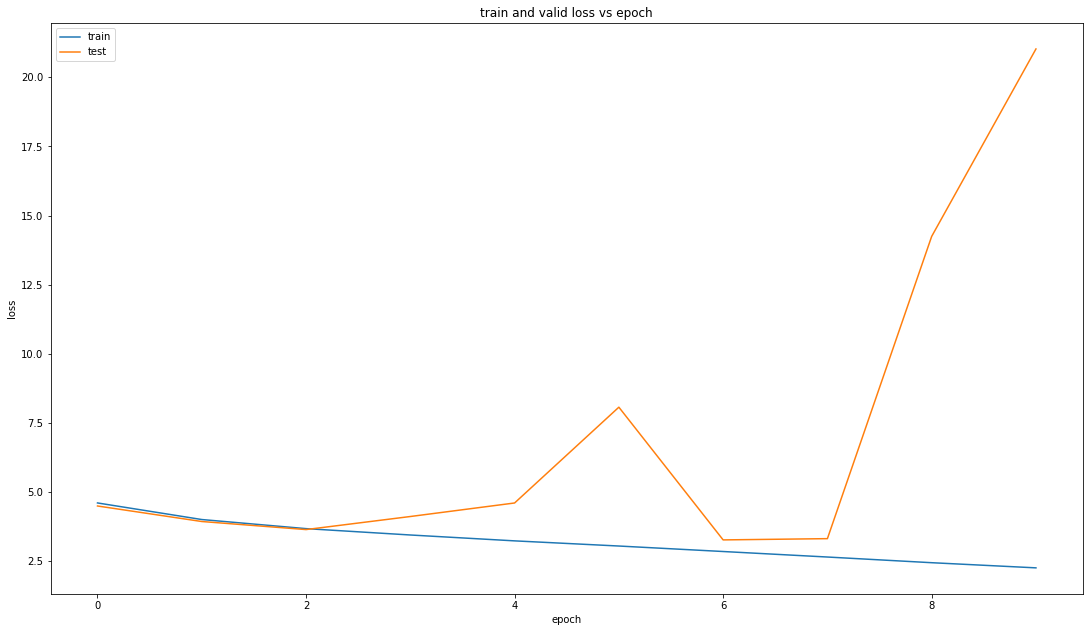

In [13]:
helper_functions.plot_losses(resnet50_test_1_history)

NameError: name 'helper_functions' is not defined

#### Find perfect learning rate

In [17]:
resnet50.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model with lr_scheduler
resnet50_lr_finding_history = resnet50.fit(train_data,
                                           validation_data=validation_data,
                                           epochs=100,
                                           callbacks=[lr_scheduler])